# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [268]:
# import libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

In [269]:
# load messages dataset
messages = pd.read_csv("messages.csv")
messages.shape

(26248, 4)

In [270]:
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [271]:
# load categories dataset
categories = pd.read_csv("categories.csv")
categories.shape

(26248, 2)

In [272]:
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [273]:
# merge datasets
df = pd.merge(messages, categories, on="id")
df.shape

(26386, 5)

In [274]:
df.duplicated().value_counts()

False    26216
True       170
Name: count, dtype: int64

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [275]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(pat=";", expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [276]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x[:-2])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [277]:
categories.shape

(26386, 36)

In [278]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.tail()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
26381,related-0,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
26382,related-0,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
26383,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
26384,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-1,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
26385,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [279]:
categories.shape

(26386, 36)

### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [280]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype("str").str[-1]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype("int")
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
df.shape

(26386, 5)

In [282]:
categories.shape

(26386, 36)

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [283]:
# drop the original categories column from `df`
df = df.drop(columns = ['categories'])
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [284]:
df['genre'].unique()

array(['direct', 'social', 'news'], dtype=object)

In [285]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.tail(20)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
26366,30243,The new constitution declares that 'Somalia is...,NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26367,30245,We're providing clean water to people who woul...,NaN,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
26368,30246,"Relief items include towels, sanitary napkins,...",NaN,news,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
26369,30247,In Aceh's Meulaboh town the UN refugee agency ...,NaN,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26370,30248,WHO is recruiting a sanitary engineer / consul...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26371,30249,Following the severe floods which occurred ove...,NaN,news,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
26372,30250,The closure has stopped 169 inbound flights an...,NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26373,30251,"BANGKOK, 24 January 2012 (NNT) - Prime Ministe...",NaN,news,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
26374,30253,"Cadmium, a metallic element widely used in bat...",NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26375,30254,Epidemic surveillance: National Institute of C...,NaN,news,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [292]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

<Axes: xlabel='missing_people'>

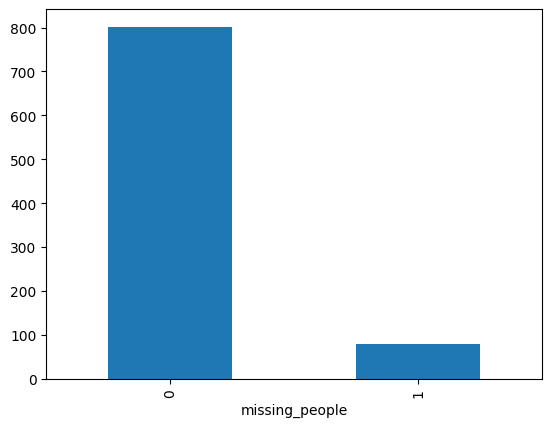

In [305]:
 #message relating to missing person and refugees. Refugees are not necessarily reported as missing
df.groupby('missing_people').sum()['refugees'].plot(kind='bar')

<Axes: title={'center': 'Categories'}, xlabel='Category', ylabel='Message Count'>

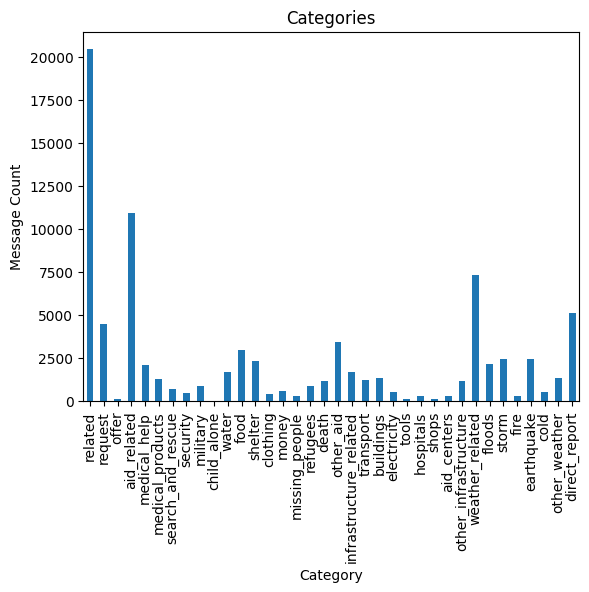

In [321]:
#Overall counts per categories in the dataset
df[df.columns[4:]].sum().plot(kind='bar', title='Categories', xlabel='Category', ylabel='Message Count')

<Axes: title={'center': 'Missing People vs Deaths'}, xlabel='Missing People', ylabel='Death Count'>

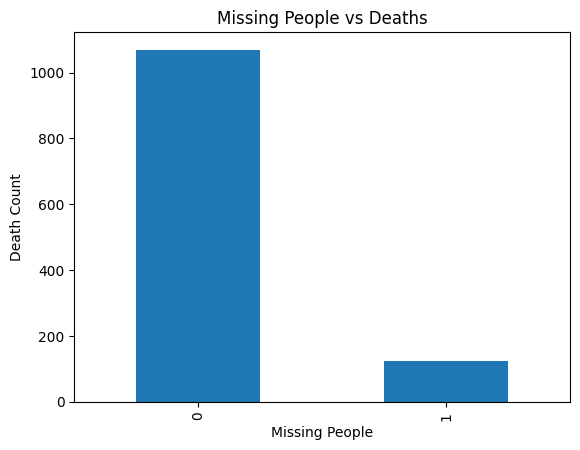

In [327]:
#Count of death on the messages that are also flagged as death
df.groupby('missing_people').sum()['death'].plot(kind='bar', title='Missing People vs Deaths', xlabel='Missing People', ylabel='Death Count')

<Axes: title={'center': 'Genre'}, xlabel='Genre', ylabel='Count'>

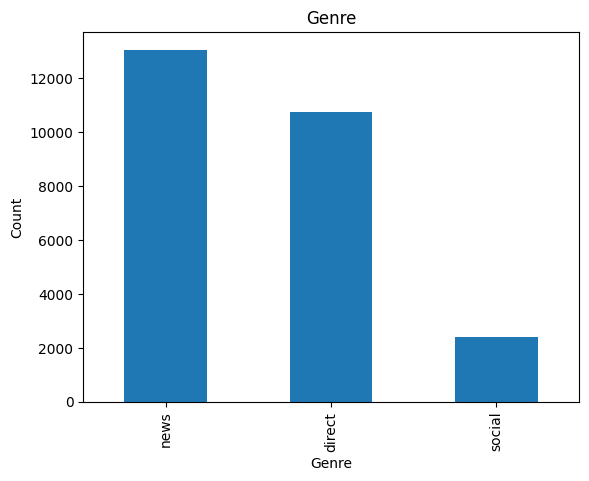

In [329]:
#Plots the message counts per genre
df['genre'].value_counts().plot(kind='bar', title='Genre', xlabel='Genre', ylabel='Count')

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [231]:
#Check for nulls
df.isna().sum()

id                            0
message                       0
original                  16140
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [322]:
# check number of duplicates
df.duplicated().value_counts()

False    26216
True       170
Name: count, dtype: int64

In [323]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [324]:
# check number of duplicates
df.duplicated().value_counts()

False    26216
Name: count, dtype: int64

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [325]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('Messages',engine, if_exists='replace' , index=False)

26216

### 8. Use this notebook to complete `process_data.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `process_data.py` in the classroom on the `Project Workspace IDE` coming later.